# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

plotting a scatter plot for Date and Rented Bike Count 
and for Hour and Temperature (C)

In [2]:
### Your code here
bike_rentals = pd.read_csv("SeoulBikeData.csv")
bike_rentals


,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,Autumn,No Holiday,Yes


In [3]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

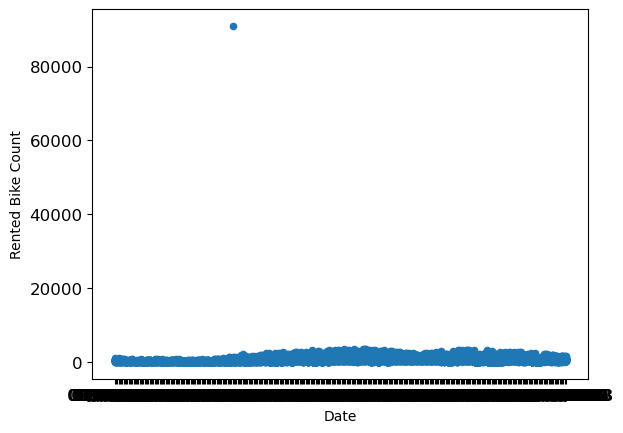

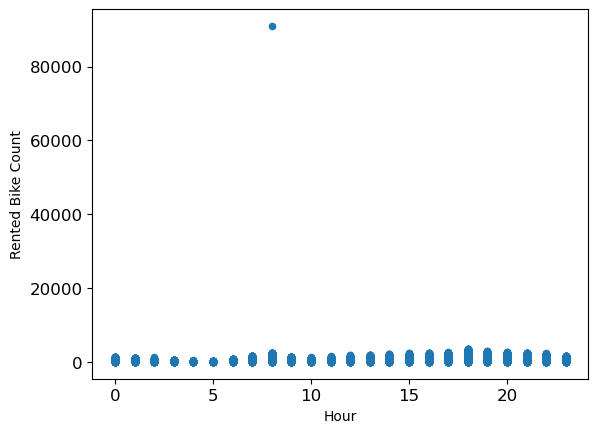

In [4]:
bike_rentals.plot(kind='scatter', x="Date", y="Rented Bike Count")

bike_rentals.plot(kind='scatter',x ="Hour",y="Rented Bike Count")
        
plt.show()

plotting a histogram plot for Dew point temperature (C) and Rented Bike Count

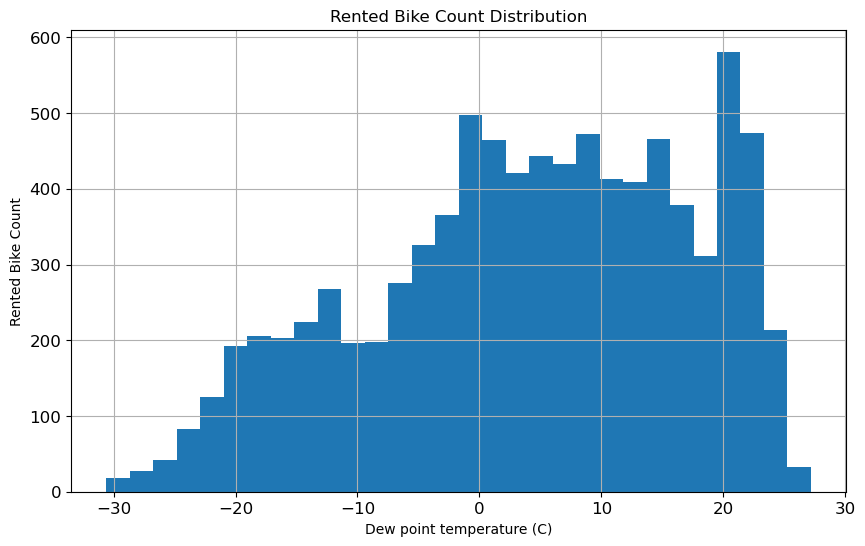

In [5]:

plt.figure(figsize = (10,6))

bike_rentals['Dew point temperature (C)'].plot(kind='hist', bins=30, title='Rented Bike Count Distribution')
plt.xlabel('Dew point temperature (C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()


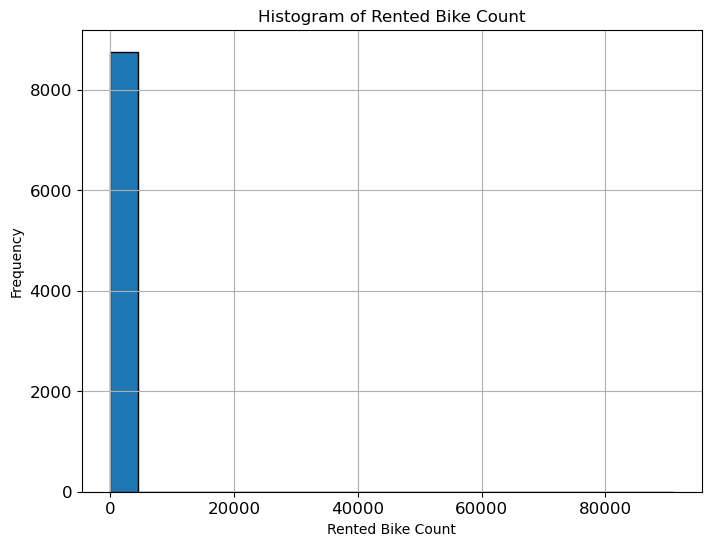

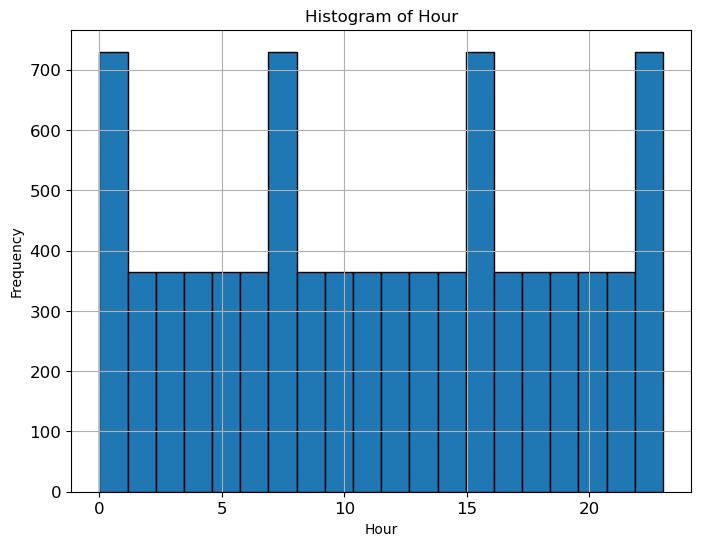

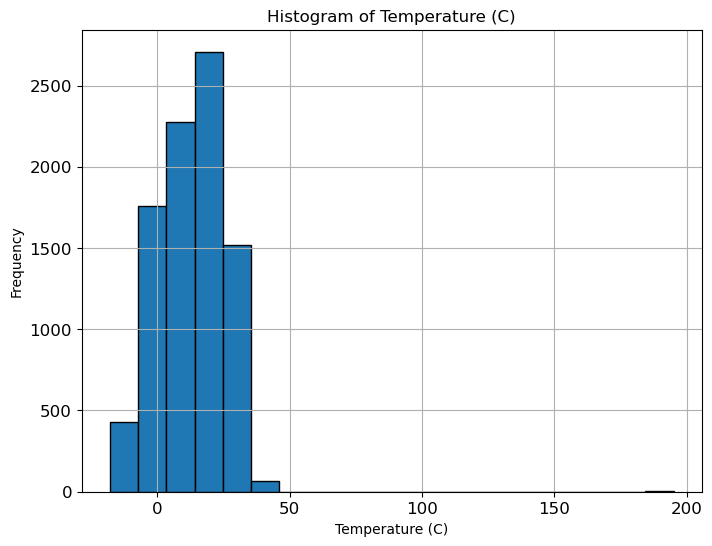

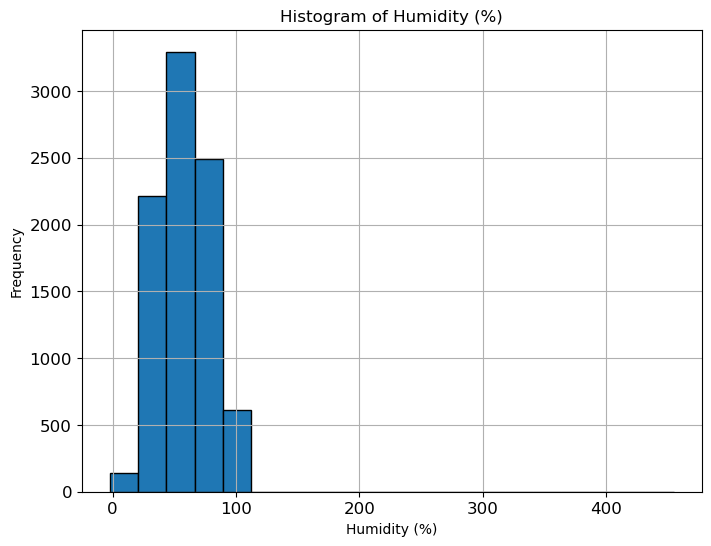

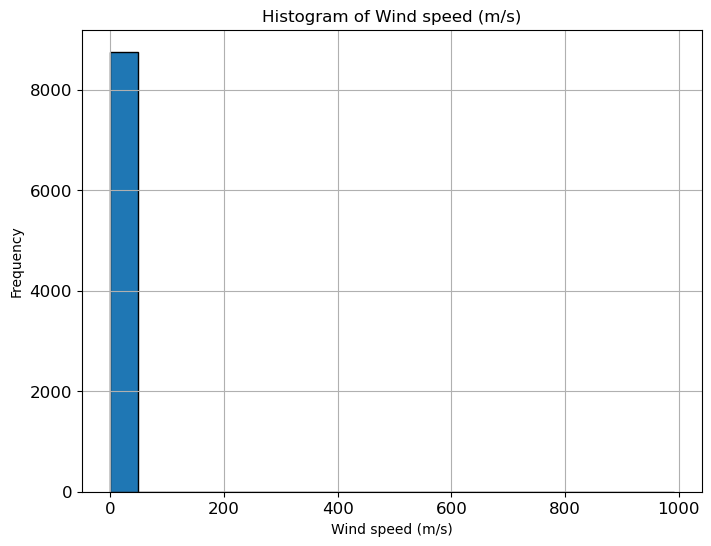

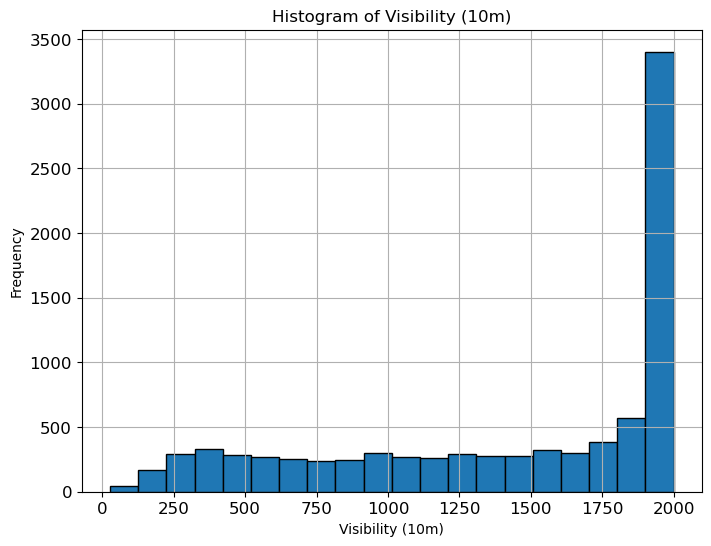

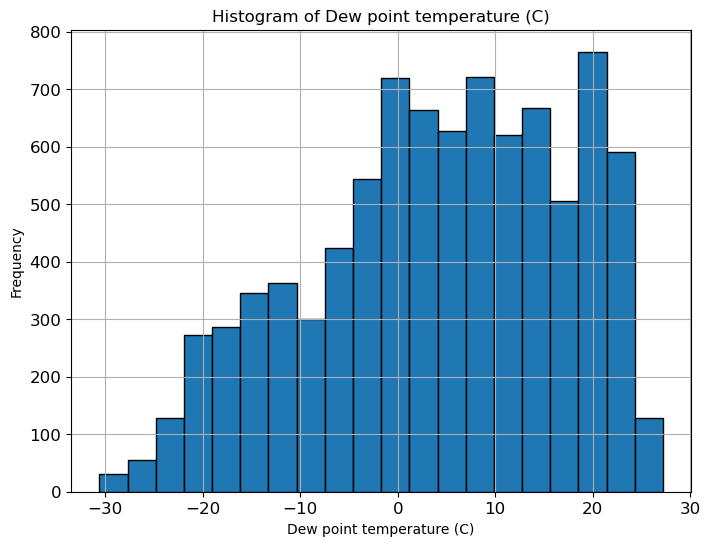

In [6]:
numerical_columns = bike_rentals.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(bike_rentals[column], bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Plotting a heatmap 

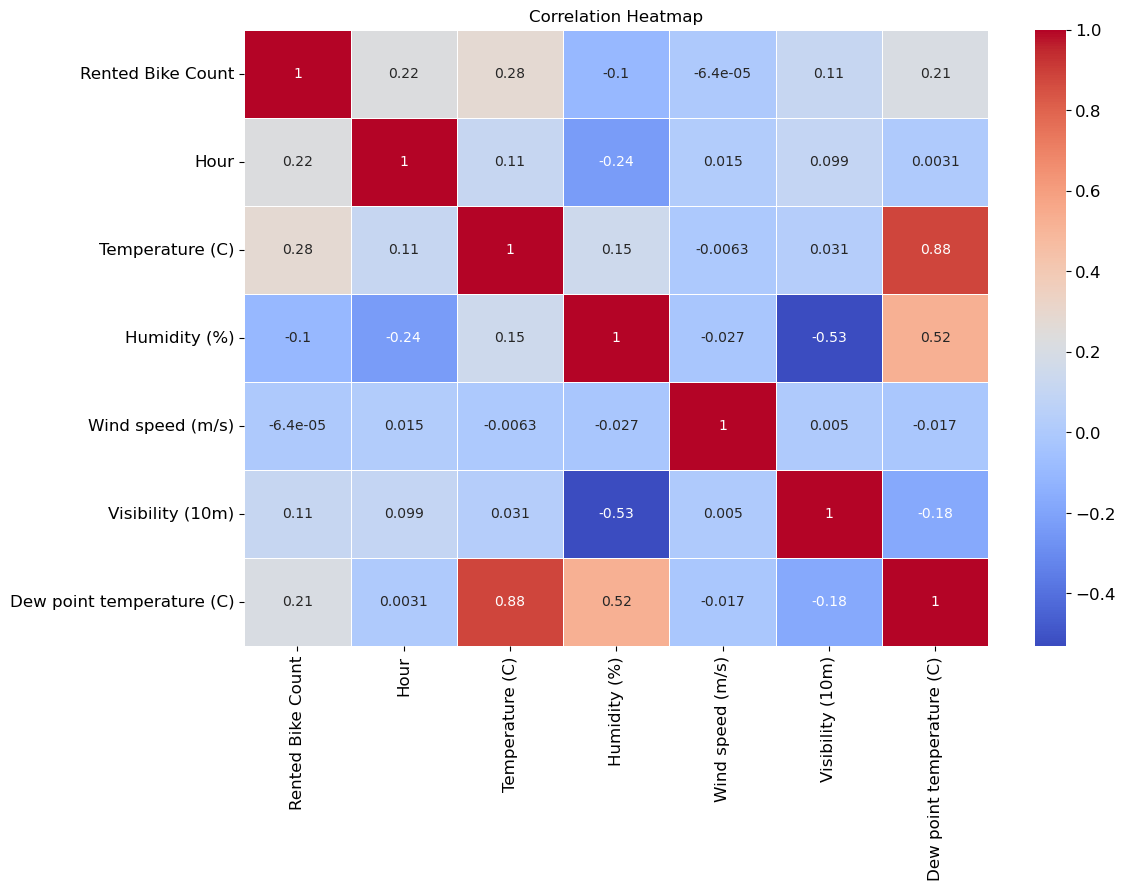

In [7]:

import seaborn as sns
correlation_matrix = bike_rentals.corr(numeric_only = True)


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

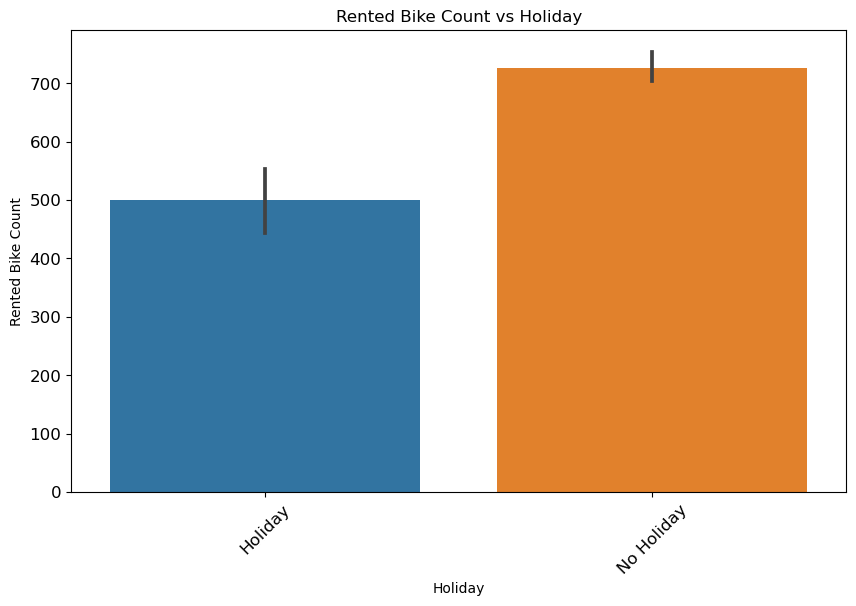

In [8]:
bike_rentals['Holiday'] = bike_rentals['Holiday'].astype('category')

# Plotting bar plot for 'Rented Bike Count' vs 'Holiday'
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=bike_rentals)
plt.title('Rented Bike Count vs Holiday')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.xticks(rotation=45)
plt.show()

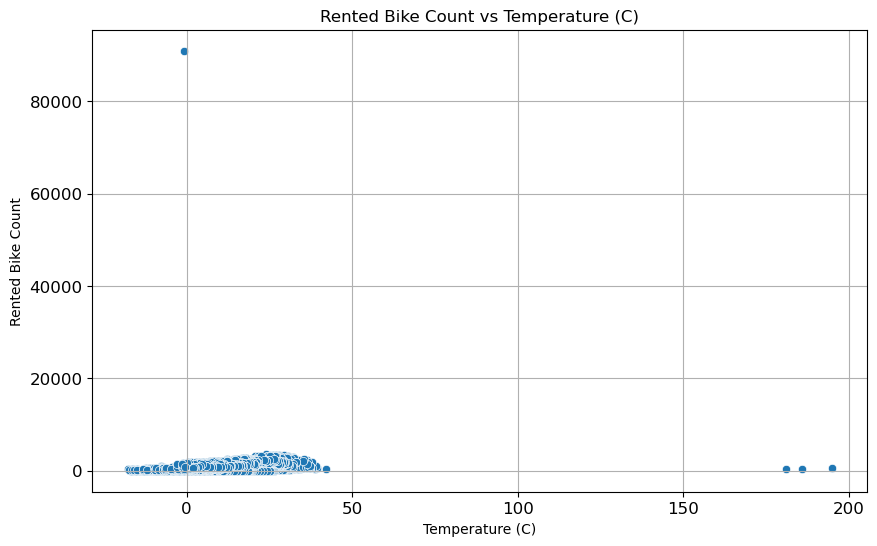

In [9]:
bike_rentals['Temperature (C)'] = pd.to_numeric(bike_rentals['Temperature (C)'], errors='coerce')  # Handle any non-numeric values

# Create scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=bike_rentals, x='Temperature (C)', y='Rented Bike Count')
plt.title('Rented Bike Count vs Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

plotting a bar graph


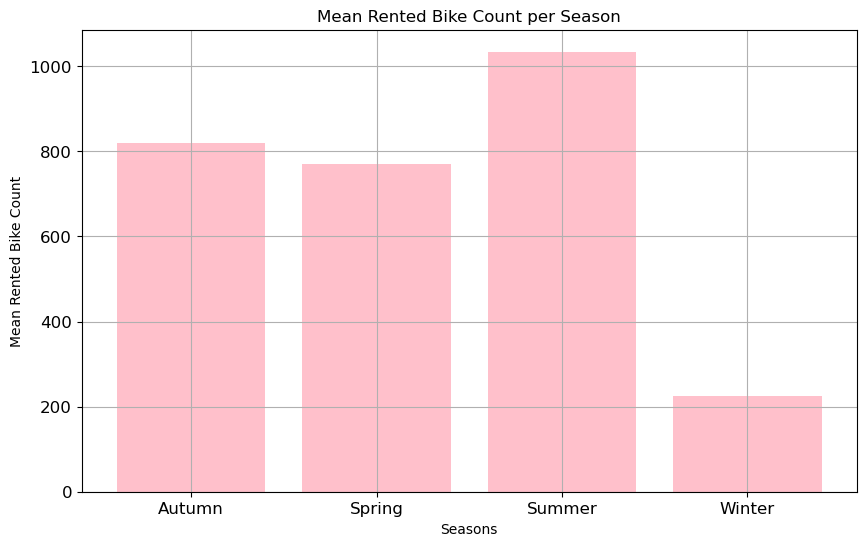

In [10]:

mean_rentals_per_season = bike_rentals.groupby('Seasons')['Rented Bike Count'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(mean_rentals_per_season['Seasons'], mean_rentals_per_season['Rented Bike Count'], color='pink')
plt.xlabel('Seasons')
plt.ylabel('Mean Rented Bike Count')
plt.title('Mean Rented Bike Count per Season')
plt.grid(True)
plt.show()


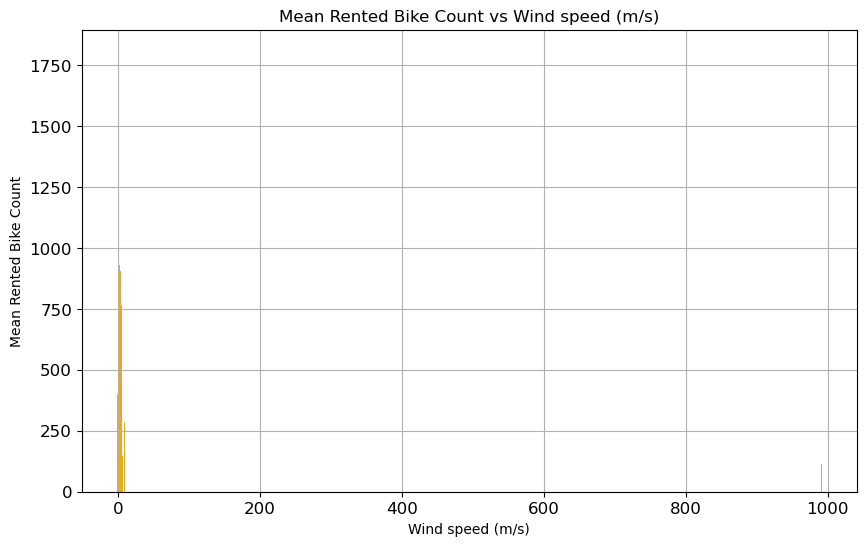

In [11]:

mean_rentals_per_season = bike_rentals.groupby('Wind speed (m/s)')['Rented Bike Count'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(mean_rentals_per_season['Wind speed (m/s)'], mean_rentals_per_season['Rented Bike Count'], color='orange')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Mean Rented Bike Count')
plt.title('Mean Rented Bike Count vs Wind speed (m/s)')
plt.grid(True)
plt.show()


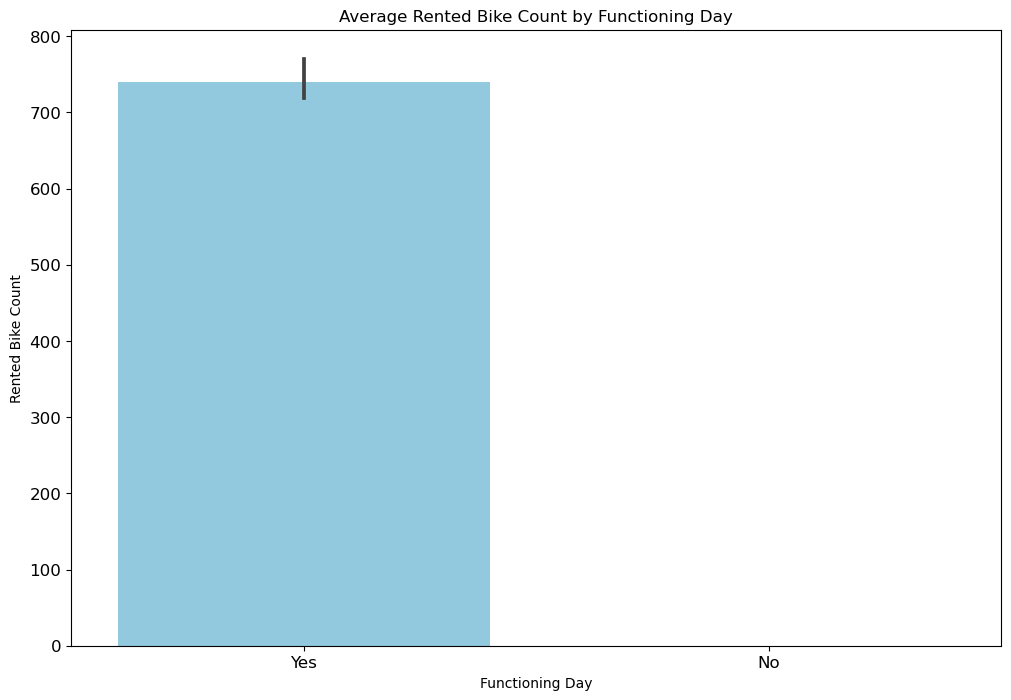

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Functioning Day', y='Rented Bike Count', data=bike_rentals, color="skyblue")
plt.title('Average Rented Bike Count by Functioning Day')
plt.xlabel('Functioning Day')
plt.ylabel('Rented Bike Count')
plt.show()

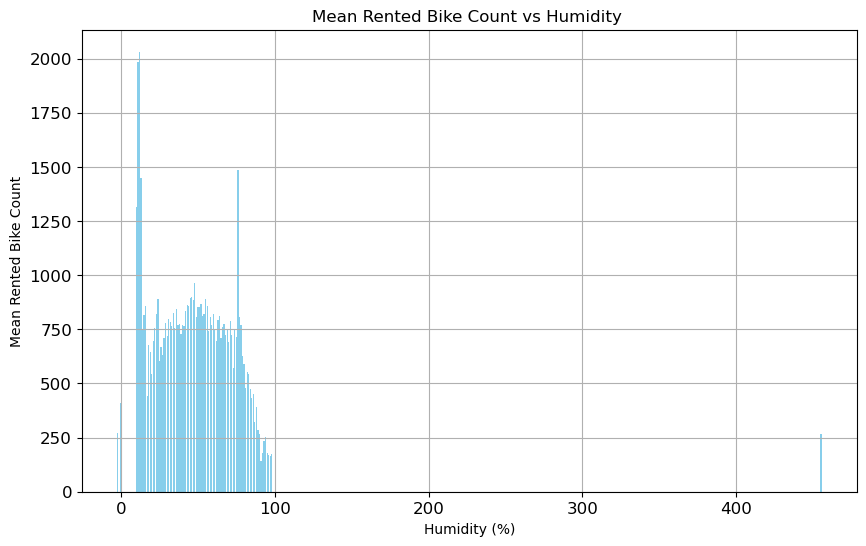

In [13]:

mean_rentals_per_season = bike_rentals.groupby('Humidity (%)')['Rented Bike Count'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(mean_rentals_per_season['Humidity (%)'], mean_rentals_per_season['Rented Bike Count'], color='skyblue')
plt.xlabel('Humidity (%)')
plt.ylabel('Mean Rented Bike Count')
plt.title('Mean Rented Bike Count vs Humidity ')
plt.grid(True)
plt.show()


### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [14]:
bike_rentals_open = bike_rentals[bike_rentals['Functioning Day'] == 'Yes']

# Drop the Functioning Day column from the DataFrame
bike_rentals_open = bike_rentals_open.drop(columns=['Functioning Day'])
bike_rentals_open

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34.0,2.6,1894,-10.3,0,0,0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37.0,2.3,2000,-9.9,0,0,0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39.0,0.3,1968,-9.9,0,0,0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41.0,1.0,1859,-9.8,0,0,0,Autumn,No Holiday


In [35]:
bike_rentals_encoded = pd.get_dummies(bike_rentals_open, columns=['Seasons'], drop_first=False)


In [36]:
import datetime
def date_is_weekday(datestring):
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]), int(dsplit[1]), int(dsplit[0])).weekday()
    return int(wday <= 4)

# Apply the function to create a new 'Weekday' column
bike_rentals_encoded['Weekday'] = bike_rentals_encoded['Date'].apply(date_is_weekday)
bike_rentals_encoded.drop(columns=['Date'], inplace=True)


In [37]:
# Convert 'Holiday' column to binary (0s and 1s)
bike_rentals_encoded['Holiday'] = bike_rentals_encoded['Holiday'].apply(lambda x: 1 if x == 'Yes' else 0)



In [38]:
# Convert boolean columns to 0 and 1
bike_rentals_encoded[['Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']] = bike_rentals_encoded[
    ['Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']
].astype(int)


In [39]:
bike_rentals_encoded['Solar Radiation (MJ/m2)'] = pd.to_numeric(bike_rentals_encoded['Solar Radiation (MJ/m2)'], errors='coerce')
bike_rentals_encoded['Rainfall(mm)'] = pd.to_numeric(bike_rentals_encoded['Rainfall(mm)'], errors='coerce')
bike_rentals_encoded['Snowfall (cm)'] = pd.to_numeric(bike_rentals_encoded['Snowfall (cm)'], errors='coerce')



In [21]:
bike_rentals_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   float64
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8464 non-null   float64
 8   Rainfall(mm)               8444 non-null   float64
 9   Snowfall (cm)              8444 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  Seasons_Autumn             8465 non-null   int32  
 12  Seasons_Spring             8465 non-null   int32  
 13  Seasons_Summer             8465 non-null   int32

In [40]:
from scipy import stats

# Calculate Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(bike_rentals_encoded))

# Define threshold for outliers (e.g., Z-score > 3)
threshold = 3

# Create a boolean mask for outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Print rows with outliers
print("Rows with outliers:")
bike_rentals_encoded[outlier_mask]

Rows with outliers:


,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday
950,265,14,-1.8,455.0,3.7,1922,-12.1,1.06,0.0,0.2,0,0,0,0,1,1
2288,90997,8,-0.7,76.0,1.0,1461,-4.4,0.20,0.0,0.0,0,0,1,0,0,1
2860,115,4,9.9,67.0,991.1,820,4.0,0.00,0.0,0.0,0,0,1,0,0,1
2861,117,5,10.4,62.0,91.8,911,3.4,0.00,0.0,0.0,0,0,1,0,0,1
4370,554,2,195.0,72.0,1.4,1258,13.8,0.00,0.0,0.0,0,0,0,1,0,1
4371,366,3,186.0,72.0,1.4,1340,13.4,0.00,0.0,0.0,0,0,0,1,0,1
4372,265,4,181.0,76.0,1.8,561,13.7,0.00,0.0,0.0,0,0,0,1,0,1


In [23]:
bike_rentals_clean = bike_rentals_encoded[~outlier_mask]
bike_rentals_clean

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday
0,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,1
1,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,1
2,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1,1
3,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,1
4,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,0,1,0,0,0,1
8756,764,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,0,1,0,0,0,1
8757,694,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,0,1,0,0,0,1
8758,712,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,0,1,0,0,0,1


In [24]:
bike_rentals_clean.to_csv('CleanedSeoulBikeData.csv', index=False)

In [25]:
bike_rentals_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8458 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8458 non-null   int64  
 1   Hour                       8458 non-null   int64  
 2   Temperature (C)            8458 non-null   float64
 3   Humidity (%)               8458 non-null   float64
 4   Wind speed (m/s)           8458 non-null   float64
 5   Visibility (10m)           8458 non-null   int64  
 6   Dew point temperature (C)  8458 non-null   float64
 7   Solar Radiation (MJ/m2)    8457 non-null   float64
 8   Rainfall(mm)               8437 non-null   float64
 9   Snowfall (cm)              8437 non-null   float64
 10  Holiday                    8458 non-null   int64  
 11  Seasons_Autumn             8458 non-null   int32  
 12  Seasons_Spring             8458 non-null   int32  
 13  Seasons_Summer             8458 non-null   int32

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [42]:
### Your code here
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

bike_rentals_clean =bike_rentals_clean.apply(pd.to_numeric, errors='coerce')

# Define pipeline with imputer
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Fit and transform the pipeline on the DataFrame
bike_rentals_cl = pipeline.fit_transform(bike_rentals_clean)

# Convert back to DataFrame (if needed)
bike_rentals_cl = pd.DataFrame(bike_rentals_cl, columns=bike_rentals_clean.columns)



In [43]:

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
bike_rentals_cl_scaled = scaler.fit_transform(bike_rentals_cl)

# Convert scaled array back to DataFrame with original columns
bike_rentals_cl_scaled = pd.DataFrame(bike_rentals_cl_scaled, columns= bike_rentals_cl.columns)

bike_rentals_cl_scaled

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday
0,-0.740050,-1.663443,-1.484663,-1.031046,0.456107,0.929100,-1.626691,-0.653675,-0.132551,-0.076769,0.0,-0.545014,-0.585087,-0.593827,1.708085,0.636933
1,-0.817877,-1.518944,-1.509437,-0.982261,-0.892892,0.929100,-1.626691,-0.653675,-0.132551,-0.076769,0.0,-0.545014,-0.585087,-0.593827,1.708085,0.636933
2,-0.866130,-1.374446,-1.550728,-0.933476,-0.700178,0.929100,-1.634241,-0.653675,-0.132551,-0.076769,0.0,-0.545014,-0.585087,-0.593827,1.708085,0.636933
3,-0.968862,-1.229947,-1.567244,-0.884691,-0.796535,0.929100,-1.626691,-0.653675,-0.132551,-0.076769,0.0,-0.545014,-0.585087,-0.593827,1.708085,0.636933
4,-1.014001,-1.085448,-1.550728,-1.079831,0.552464,0.929100,-1.702194,-0.653675,-0.132551,-0.076769,0.0,-0.545014,-0.585087,-0.593827,1.708085,0.636933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8453,0.425803,1.082031,-0.708397,-1.177401,0.841535,0.755074,-1.075513,-0.653675,-0.132551,-0.076769,0.0,1.834815,-0.585087,-0.593827,-0.585451,0.636933
8454,0.053788,1.226530,-0.774462,-1.031046,0.552464,0.929100,-1.045312,-0.653675,-0.132551,-0.076769,0.0,1.834815,-0.585087,-0.593827,-0.585451,0.636933
8455,-0.055170,1.371029,-0.840527,-0.933476,-1.374677,0.876564,-1.045312,-0.653675,-0.132551,-0.076769,0.0,1.834815,-0.585087,-0.593827,-0.585451,0.636933
8456,-0.027152,1.515527,-0.881818,-0.835906,-0.700178,0.697613,-1.037761,-0.653675,-0.132551,-0.076769,0.0,1.834815,-0.585087,-0.593827,-0.585451,0.636933


### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [44]:
### Your ChatGPT prompt
from sklearn.model_selection import train_test_split

# Assuming df_cl_scaled is your DataFrame containing scaled numeric data

# Define features (X) and target variable (y)
X = bike_rentals_cl_scaled.drop(columns=['Rented Bike Count'])  # Features (all columns except target)
y = bike_rentals_cl_scaled['Rented Bike Count']  # Target variable


# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_test contain features, y_train, y_test contain the target variable



In [29]:
### Code here (with outputs)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


LRG = LinearRegression()

# Fit the LR to the training data
LRG.fit(X_train, y_train)

# Predict on the training data
y_pred_train = LRG.predict(X_train)

# Calculate RMSE on the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE on training data: {rmse_train:.2f}")

RMSE on training data: 0.68


In [30]:
### Your code and outputs here


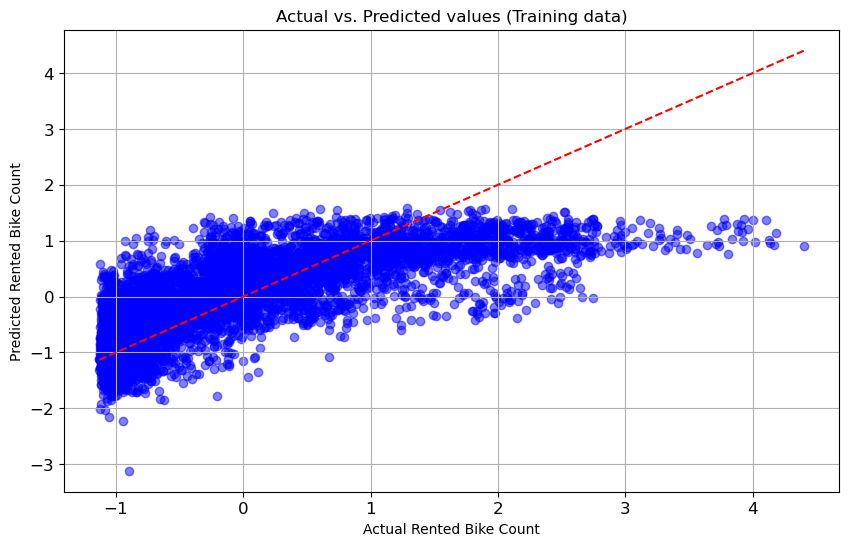

In [31]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')
plt.title('Actual vs. Predicted values (Training data)')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.grid(True)
plt.show()

## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [32]:
# Your ChatGPT prompt
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.svm import SVR

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)



#defining SVR
svr =  SVR()


# Function to perform cross-validation and calculate RMSE
def cross_validate_rmse(model, X, y, cv):
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
    return rmse_scores

# Cross-validation for Linear Regression
lr_baseline_scores = cross_validate_rmse(LRG, X_train, y_train, cv=kf)
print(f"Linear Regression Baseline RMSE: Mean = {lr_baseline_scores.mean()}, Std = {lr_baseline_scores.std()}")

# Cross-validation for SVR
svr_baseline_scores = cross_validate_rmse(svr, X_train, y_train, cv=kf)
print(f"SVR Baseline RMSE: Mean = {svr_baseline_scores.mean()}, Std = {svr_baseline_scores.std()}")


Linear Regression Baseline RMSE: Mean = 0.6860846656549018, Std = 0.028440280267202054
SVR Baseline RMSE: Mean = 0.4749844072647294, Std = 0.02825809524455741


In [33]:
para_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}

# GridSearchCV for SVR
svr_grid_search = GridSearchCV(SVR(), para_grid_svr, scoring='neg_mean_squared_error', cv=kf)
svr_grid_search.fit(X_train, y_train)

# Best parameters and RMSE for SVR after optimization
print("SVR Best Parameters:", svr_grid_search.best_params_)
print("SVR Best RMSE:", np.sqrt(-svr_grid_search.best_score_))

SVR Best Parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
SVR Best RMSE: 0.4194056134701964


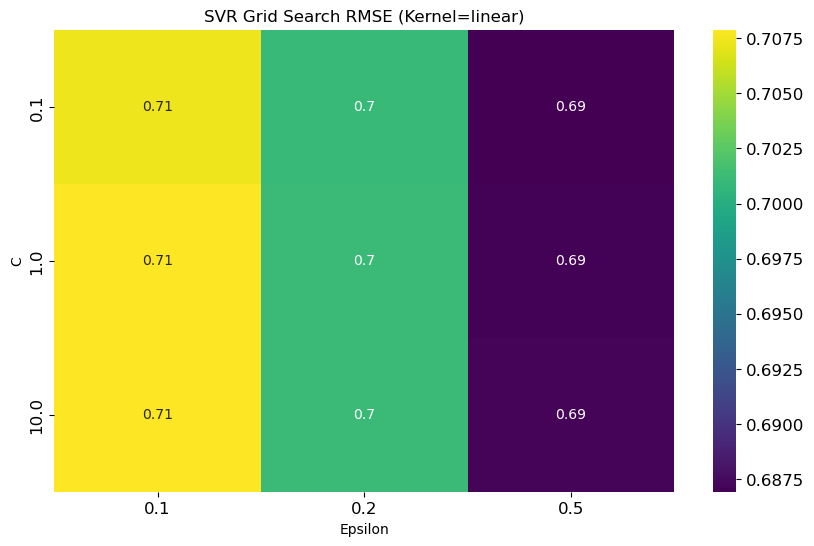

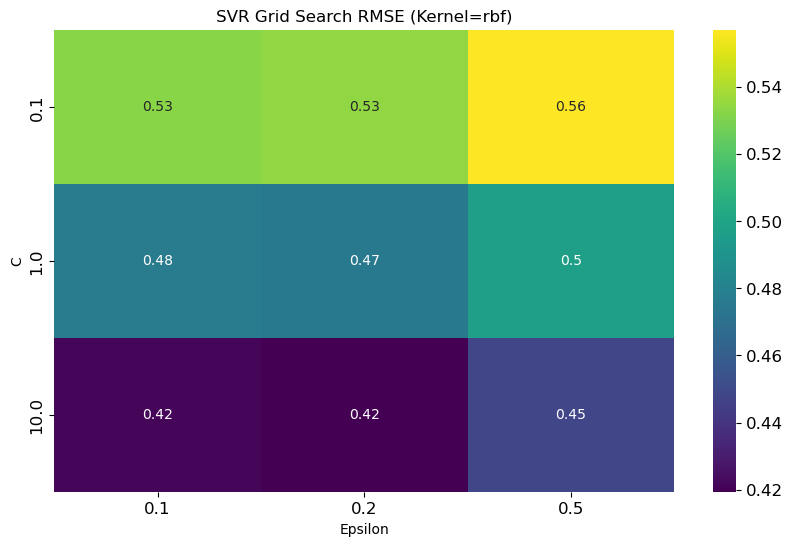

In [46]:
results = svr_grid_search.cv_results_

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

def plot_heatmap(kernel):
    # Filter results for the specific kernel
    filtered_results = results_df[results_df['param_kernel'] == kernel]

    # Pivot the table to format it for heatmap
    heatmap_data = filtered_results.pivot_table(index='param_C', columns='param_epsilon', values='mean_test_score')

    # Convert negative MSE to positive RMSE for better interpretability
    heatmap_data = np.sqrt(-heatmap_data)

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, cmap="viridis")
    plt.title(f'SVR Grid Search RMSE (Kernel={kernel})')
    plt.xlabel('Epsilon')
    plt.ylabel('C')
    plt.show()

# Plot heatmaps for both 'linear' and 'rbf' kernels
plot_heatmap('linear')
plot_heatmap('rbf')

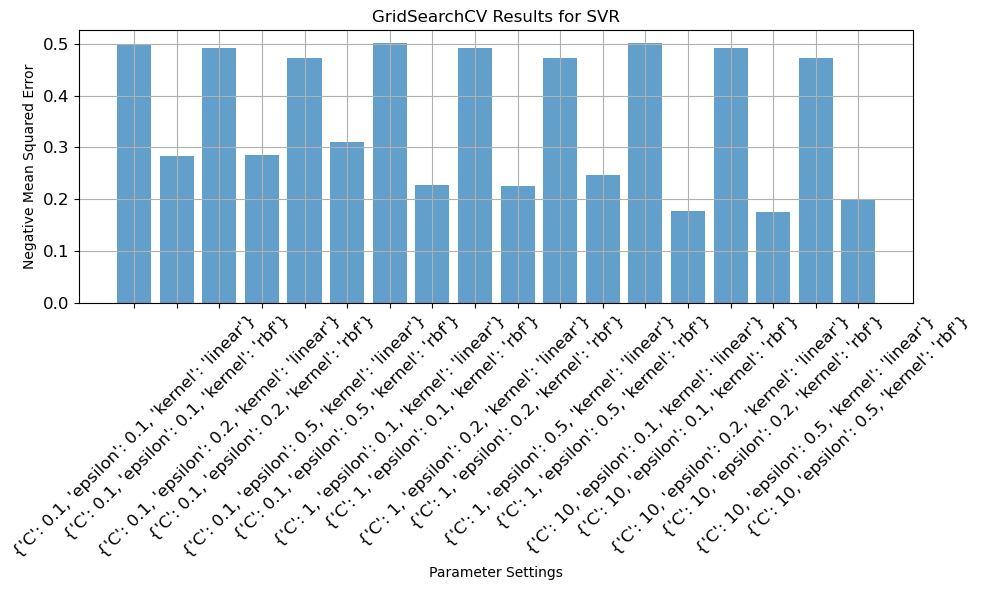

In [47]:
# Visualizing the results
results = svr_grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.title("GridSearchCV Results for SVR")
plt.xlabel("Parameter Settings")
plt.ylabel("Negative Mean Squared Error")
plt.grid(True)

# Plotting each parameter setting against the negative MSE
x_axis = np.arange(len(results['params']))
plt.bar(x_axis, -results['mean_test_score'], align='center', alpha=0.7)
plt.xticks(x_axis, [str(param) for param in results['params']], rotation=45)
plt.tight_layout()
plt.show()

## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

RMSE: 0.40047312000406954


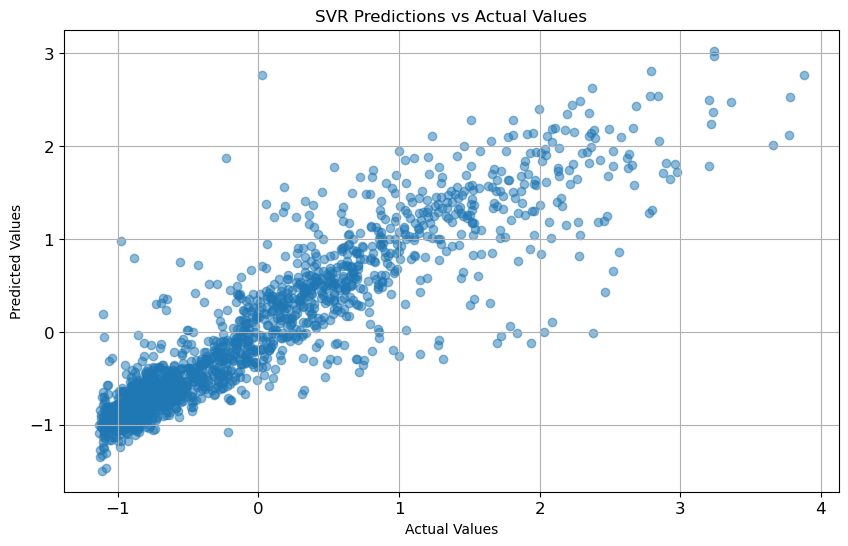

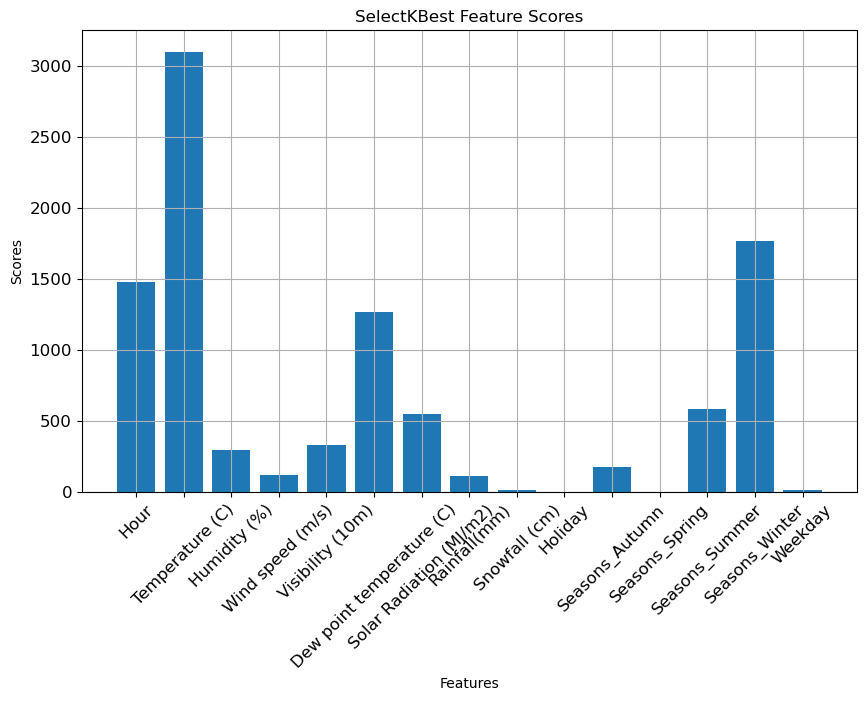

In [51]:
### Your answer here (maximum of 200 words)
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Define the SelectKBest and SVR pipeline
pipeline = Pipeline([
    ('select_k_best', SelectKBest(score_func=f_regression, k=15)),  # Adjust k as needed
    ('regressor', SVR(C=10, epsilon=0.2, kernel='rbf'))  # Using the best parameters here
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR Predictions vs Actual Values")
plt.grid(True)
plt.show()

# Feature importance visualization (for SelectKBest)
selected_features = X_train.columns[pipeline.named_steps['select_k_best'].get_support()]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(selected_features, pipeline.named_steps['select_k_best'].scores_[pipeline.named_steps['select_k_best'].get_support()])
plt.xlabel("Features")
plt.ylabel("Scores")
plt.title("SelectKBest Feature Scores")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


    I have used SelectKBest,which is a feature selection method that selects top features SelectKBest filters 'k' best features according to their importance came across from comparing a variable with its target using statistical tests such as f_regression. This helps eliminate the exposure of the model to ‘redundant’ features that do not add value to the modeling process, hence improving model performance.

    ‘Dimensionality Reduction’, It reduce the number of attributes and hence reduce the model size and computational expense. It excludes the unnecessary features which often interfere with the quality of the obtained model. Having fewer features is however a benefit of the model because its comprehension and interpretation becomes easier.

    Reduction of RMSE:
        SelectKBest helps to remove irrelevant features and work only with the most important ones as it tries to maximize the correlation between feature set and target score.Less number of features remove the chances of overfitting which in return improve on the unseen data on available RMSE.

    How it improved my code:
        It saves computational time as training of the model is only carried out on features deemed important in categorizing the images.Bolster model performance using the most pertinent features: a clear indication is a decrease in the RMSE measure.Yields a model with less complexity and hence easier to debug, maintain and deploy than another model generated using the same data set.

